This notebook creates a WT network, then swappes the WT morphologies in the network file for degenerated PD morphologies where part of the dendrites have been removed. The synapses and inputs on the degenerated parts of the morphologies are automatically removed.

In [1]:
import os
from snudda.init import SnuddaInit

# Future location
pre_str = os.path.join("..", "..", "..", "..")

SNUDDA_DATA_WT = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD0")
SNUDDA_DATA_PD2 = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD2")

# Basal Ganglia Data folder
SNUDDA_DATA_WT = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD0")
SNUDDA_DATA_PD2 = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD2")

os.environ["SNUDDA_DATA"] = SNUDDA_DATA_WT
network_path_WT = "WT-network"
network_path_PD2 = "PD2-network"

si = SnuddaInit(struct_def={}, network_path=network_path_WT, random_seed=1234)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parki

In [2]:
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(os.getcwd(), ".ipython", "profile_default", "security", 
                      "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_WT, rc=rc)
sp.place()

Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/0/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/11/parameters.json
Missing parameter.json : /home

In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_WT, rc=rc)
sd.detect()

Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/0/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/11/parameters.json
Missing parameter.json : /home

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_WT, rc=rc)
sp.prune()

Worker synapses: 14/1444843 (heap size: 19)
Worker synapses: 1444843/1444843 (heap size: 0)
Read 1444843 out of total 1444843 synapses
Read 7 out of total 7 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_WT, 
                 input_config_file="dummy-input.json",   # This file does NOT have correct synapse parameters
                 verbose=False)
si.generate()

Loading 404 neurons with 71951 synapses and 3 gap junctions
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/25/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/14/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/5/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/8/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/n

In [7]:
original_network_file = os.path.join(network_path_WT, "network-synapses.hdf5")
original_input_file = os.path.join(network_path_WT, "input-spikes.hdf5")

new_network_file = os.path.join(network_path_PD2, "network-synapses.hdf5")
new_input_file = os.path.join(network_path_PD2, "input-spikes.hdf5")

In [10]:
from snudda.utils.swap_to_degenerated_morphologies import SwapToDegeneratedMorphologies

swap = SwapToDegeneratedMorphologies(original_network_file=original_network_file,
                                    new_network_file=new_network_file,
                                    original_snudda_data_dir=SNUDDA_DATA_WT,
                                    new_snudda_data_dir=SNUDDA_DATA_PD2,
                                    original_input_file=original_input_file,
                                    new_input_file=new_input_file,
                                    filter_axon=True)
swap.write_new_network_file()
swap.write_new_input_file()
swap.close()

Loading 404 neurons with 71951 synapses and 3 gap junctions
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/25/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/25/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Loading 404 neurons with 71951 synapses and 3 gap junctions
Loading 404 neurons with 35346 synapses and 2 gap junctions
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Plotting 325 external synapses
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/10/parameters.json
Plotting 154 external synapses
Figure written: PD2-network/figures/input-to-1-dSPN_2-and-internal-synapses.png


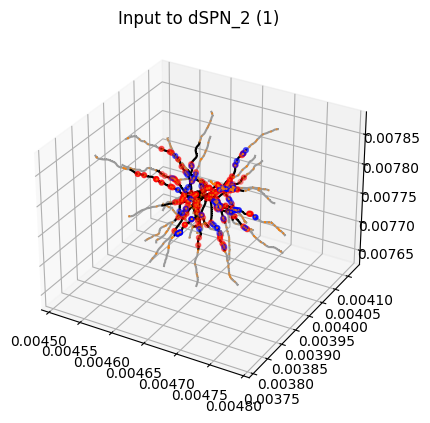

In [11]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_WT,
                      degenerated_network_path=network_path_PD2)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)